Импорт необходимых библиотек

In [17]:
import pandas as pd
import requests as r
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

Добавляем переменные окружения, создаём URL запрос, делаем срез по дате и проверяем данные.

In [22]:
load_dotenv(dotenv_path = './project.env')
DATE_BEGIN = os.getenv('DATE_BEGIN')
DATE_END = os.getenv('DATE_END')
API_URL = os.getenv('API_URL')
print(API_URL)
print(DATE_BEGIN)
print(DATE_END)

https://data-charts-api.hexlet.app/visits
2022-03-01
2023-09-02


In [23]:
dates = {'begin': DATE_BEGIN,'end': DATE_END}
response_visits = r.get(API_URL, params = dates)
df_visits = response_visits.json()
pd_df_visits = pd.DataFrame(df_visits)
pd_df_visits.head()

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 10:36:22 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Sun, 26 Feb 2023 19:48:19 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,"Wed, 01 Mar 2023 06:25:00 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
3,"Sun, 26 Feb 2023 03:58:26 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614
4,"Sun, 26 Feb 2023 06:55:23 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,f149f542-e935-4870-9734-6b4501eaf614


In [24]:
response_regs = r.get('https://data-charts-api.hexlet.app/registrations', params = dates)
df_regs = response_regs.json()
pd_df_regs = pd.DataFrame(df_regs)
pd_df_regs.head()

,datetime,email,platform,registration_type,user_id
0,"Wed, 01 Mar 2023 07:40:13 GMT",ebyrd@example.org,web,google,2e0f6bb8-b029-4f45-a786-2b53990d37f1
1,"Wed, 01 Mar 2023 13:14:00 GMT",knightgerald@example.org,web,email,f007f97c-9d8b-48b5-af08-119bb8f6d9b6
2,"Wed, 01 Mar 2023 03:05:50 GMT",cherylthompson@example.com,web,apple,24ff46ae-32b3-4a74-8f27-7cf0b8f32f15
3,"Wed, 01 Mar 2023 00:04:47 GMT",halldavid@example.org,web,email,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60
4,"Wed, 01 Mar 2023 18:31:52 GMT",denise86@example.net,web,google,27f875fc-f8ce-4aeb-8722-0ecb283d0760


Сортируем данные по возрастанию

In [25]:
pd_df_visits['datetime'] = pd.to_datetime(pd_df_visits['datetime'])
sorted_visits = pd_df_visits.sort_values(by = 'datetime', ascending=True)
sorted_visits.head()

,datetime,platform,user_agent,visit_id
41,2023-02-25 01:22:16,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,7f1ff9fe-9668-44aa-9384-11eb0dde6d08
249,2023-02-25 01:32:56,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,21010857-5395-4630-96bd-24ccda69d41c
216,2023-02-25 02:17:32,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,6500aee5-0743-49d6-9edd-e4e22317e433
79,2023-02-25 04:08:40,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,d11776a4-d157-43e0-a077-41867c362491
333,2023-02-25 05:02:00,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,9e440668-5f7e-4d34-bc6c-1a3fcdb29178


In [26]:
pd_df_regs['datetime'] = pd.to_datetime(pd_df_regs['datetime'])
sorted_regs = pd_df_regs.sort_values(by = 'datetime', ascending=True)
sorted_regs = sorted_regs.reset_index(drop = True)
sorted_regs.head()

,datetime,email,platform,registration_type,user_id
0,2023-03-01 00:04:47,halldavid@example.org,web,email,3e9914e1-5d73-4c23-b25d-b59a3aeb2b60
1,2023-03-01 00:23:00,smithrachel@example.net,android,google,b7ec78b7-fdf6-443c-bba6-01e719c26efe
2,2023-03-01 00:55:55,kendra89@example.com,android,google,2aeb1afe-7641-416f-a21b-d747dbe8d754
3,2023-03-01 01:02:01,ghernandez@example.net,android,email,7188b134-a628-4138-9d46-545fb99a91a7
4,2023-03-01 01:04:22,lisa22@example.net,android,google,93ae2189-9f3c-47ea-ba0a-b06db9fb43ae


Фильтруем данные визитов удаляя ботов

In [27]:
filtered_visits = sorted_visits[~sorted_visits['user_agent'].str.contains('bot')]
filtered_visits = filtered_visits.reset_index(drop = True)
filtered_visits.head()

,datetime,platform,user_agent,visit_id
0,2023-02-25 01:22:16,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,7f1ff9fe-9668-44aa-9384-11eb0dde6d08
1,2023-02-25 01:32:56,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,21010857-5395-4630-96bd-24ccda69d41c
2,2023-02-25 02:17:32,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,6500aee5-0743-49d6-9edd-e4e22317e433
3,2023-02-25 04:08:40,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,d11776a4-d157-43e0-a077-41867c362491
4,2023-02-25 05:02:00,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,9e440668-5f7e-4d34-bc6c-1a3fcdb29178


Группируем данные визитов, получаем последний клик, переводим дату и время в формат даты

In [28]:
df_filtered_visits = filtered_visits.sort_values(by = ['visit_id','datetime'])
grouped_visits = df_filtered_visits.groupby('visit_id').tail(1)
grouped_visits = grouped_visits.sort_values(by = 'datetime', ascending=True)
grouped_visits = grouped_visits.reset_index(drop = True)
grouped_visits['datetime'] = grouped_visits['datetime'].dt.date
grouped_visits.head()

,datetime,platform,user_agent,visit_id
0,2023-03-01,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,348148db-9841-4b42-a0e1-7631f4667f83
1,2023-03-01,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,65f98235-9667-460c-964e-5604b75b48a1
2,2023-03-01,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,31d17176-658a-425d-99ee-50c433af81d9
3,2023-03-01,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,52bc1d7e-6c8a-474b-82a6-73a4adfd4423
4,2023-03-01,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3ac77737-906e-46f2-9cd0-a52354c2676f


Получаем таблицу визитов с разделением по датам и платформам

In [29]:
done_visits = grouped_visits.groupby(['datetime','platform']).agg({'visit_id':'count'})
done_visits.head()

visit_id
datetime   platform          
2023-03-01 android         75
           ios             22
           web            279
2023-03-02 android         67
           ios             31

Проделываем тоже самое с данными о регистрациях

In [30]:
sorted_regs['datetime'] = pd.to_datetime(sorted_regs['datetime'])
sorted_regs['datetime'] = sorted_regs['datetime'].dt.date
done_regs = sorted_regs.groupby(['datetime','platform']).agg({'user_id':'count'})
done_regs.head()

user_id
datetime   platform         
2023-03-01 android        61
           ios            18
           web             8
2023-03-02 android        59
           ios            24

Соединяем таблицы по дате и платформе

In [31]:
merged_df = pd.merge(done_visits, done_regs, on = ['datetime', 'platform'], how = 'left')
merged_df.head()

visit_id  user_id
datetime   platform                   
2023-03-01 android         75       61
           ios             22       18
           web            279        8
2023-03-02 android         67       59
           ios             31       24

Пересобираем индексы и изменяем имена колонок

In [32]:
merged_df.reset_index(inplace=True)
result = merged_df.rename(columns = {'datetime':'date_group','visit_id':'visits','user_id':'registrations'})
result.head()

,date_group,platform,visits,registrations
0,2023-03-01,android,75,61
1,2023-03-01,ios,22,18
2,2023-03-01,web,279,8
3,2023-03-02,android,67,59
4,2023-03-02,ios,31,24


Получаем данные о конверсии по формуле

In [33]:
result['conversion'] = result['registrations'] / result['visits'] * 100
result.head()

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,75,61,81.333333
1,2023-03-01,ios,22,18,81.818182
2,2023-03-01,web,279,8,2.867384
3,2023-03-02,android,67,59,88.059701
4,2023-03-02,ios,31,24,77.419355


Сохраняем результат

In [34]:
result.to_json('./conversion.json')

Для расчета конверсии необходимо сгруппировать и агрегировать данные

In [35]:
for_conversion = result.groupby('date_group').agg({'visits':'sum','registrations':'sum'})
for_conversion.reset_index(inplace=True)
for_conversion.head()

,date_group,visits,registrations
0,2023-03-01,376,87
1,2023-03-02,613,106
2,2023-03-03,683,107
3,2023-03-04,647,159
4,2023-03-05,707,115


Читаем csv файл рекламных кампаний, переводим в читаемый pandas формат даты, изменяем название колонки дат

In [36]:
ads = pd.read_csv('ads.csv')
ads['date'] = pd.to_datetime(ads['date'])
ads['date'] = ads['date'].dt.date
ads = ads.rename(columns = {'date':'date_group'})
ads.head()

,date_group,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,advanced_algorithms_series,212
1,2023-03-02,google,cpc,advanced_algorithms_series,252
2,2023-03-03,google,cpc,advanced_algorithms_series,202
3,2023-03-04,google,cpc,advanced_algorithms_series,223
4,2023-03-05,google,cpc,advanced_algorithms_series,265


Обьединяем таблицы

In [37]:
merged_ads = pd.merge(for_conversion, ads, on = 'date_group', how = 'left')
merged_ads.head()

,date_group,visits,registrations,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,376,87,google,cpc,advanced_algorithms_series,212.0
1,2023-03-02,613,106,google,cpc,advanced_algorithms_series,252.0
2,2023-03-03,683,107,google,cpc,advanced_algorithms_series,202.0
3,2023-03-04,647,159,google,cpc,advanced_algorithms_series,223.0
4,2023-03-05,707,115,google,cpc,advanced_algorithms_series,265.0


Заполняем пропуски в колонке затрат, убираем лишние столбцы

In [38]:
merged_ads['cost'].fillna(0, inplace = True)
merged_ads['utm_campaign'].fillna('none', inplace = True)
merged_ads.drop(['utm_source','utm_medium'], axis = 1, inplace = True)
merged_ads.head()

,date_group,visits,registrations,utm_campaign,cost
0,2023-03-01,376,87,advanced_algorithms_series,212.0
1,2023-03-02,613,106,advanced_algorithms_series,252.0
2,2023-03-03,683,107,advanced_algorithms_series,202.0
3,2023-03-04,647,159,advanced_algorithms_series,223.0
4,2023-03-05,707,115,advanced_algorithms_series,265.0


Сохраняем результат

In [39]:
merged_ads.to_json('./ads.json')

Последний шаг - визуализация, используем полученные обработанные данные для создания графиков

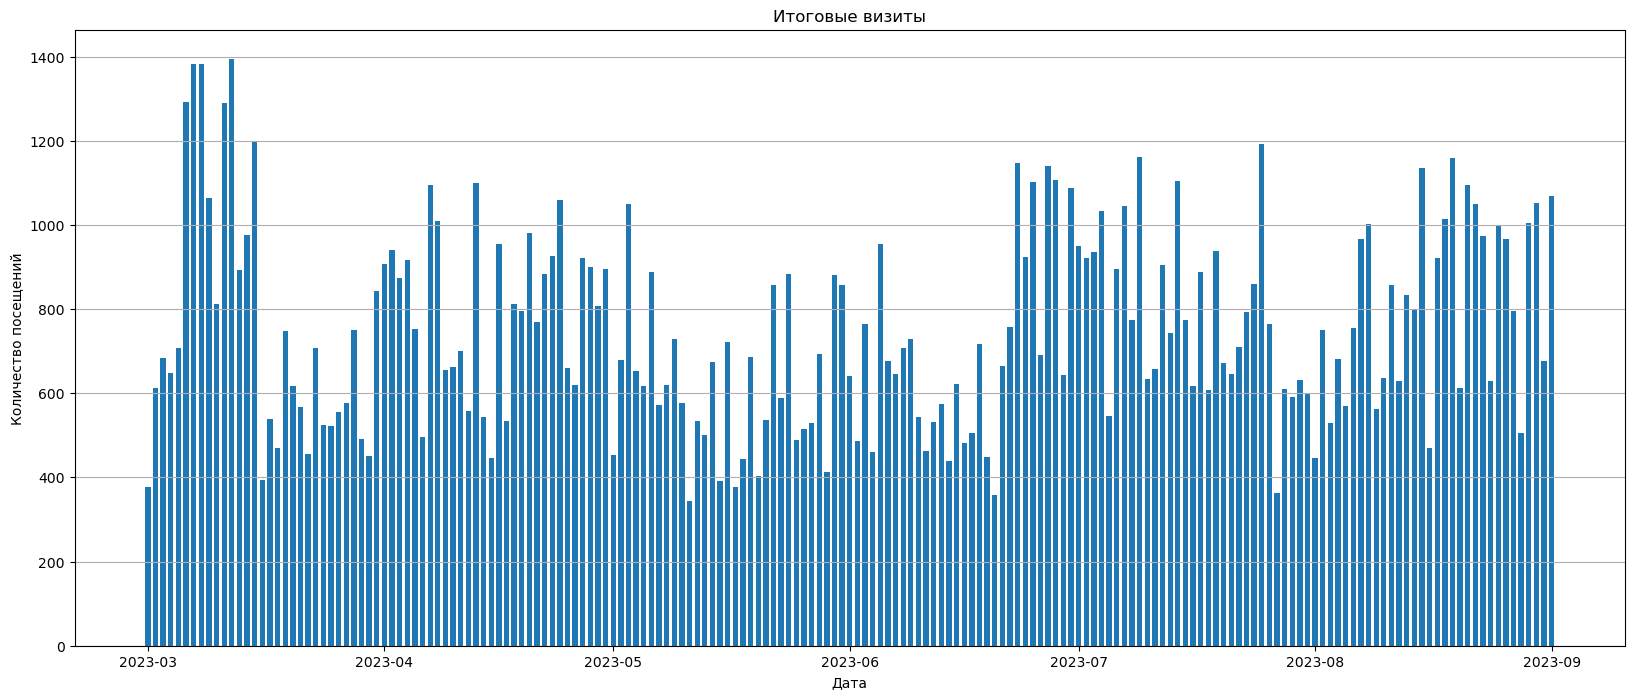

In [40]:
x = merged_ads['date_group']
y = merged_ads['visits']
fig = plt.figure(figsize = (20,8))
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Количество посещений')
plt.title('Итоговые визиты')
plt.bar(x,y, label = 'Итоговые визиты', width = 0.7)
plt.savefig('./charts/total_visits.png')
plt.show()

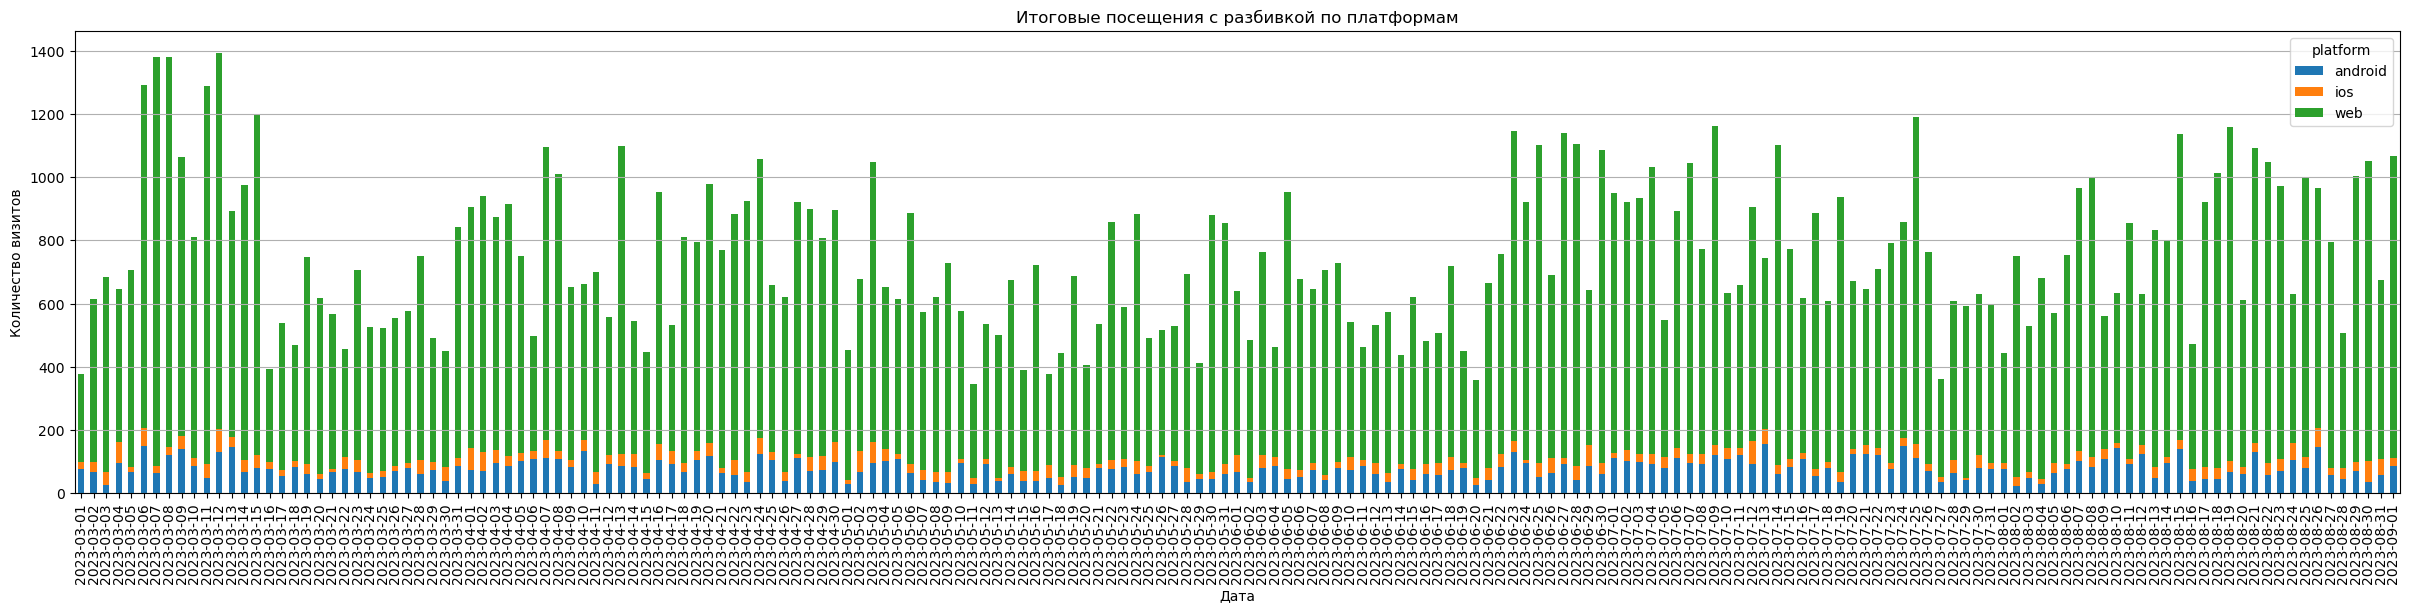

In [41]:
for_stacked_visits = result[['date_group', 'platform', 'visits']] 
pivot_df = for_stacked_visits.pivot(index='date_group', columns='platform', values='visits')
pivot_df.plot(kind = 'bar', stacked = True, figsize = (30, 6))
plt.xlabel('Дата')
plt.ylabel('Количество визитов')
plt.title('Итоговые посещения с разбивкой по платформам')
plt.grid(axis = 'y')
plt.savefig('./charts/stacked_total_visits.png')
plt.show()

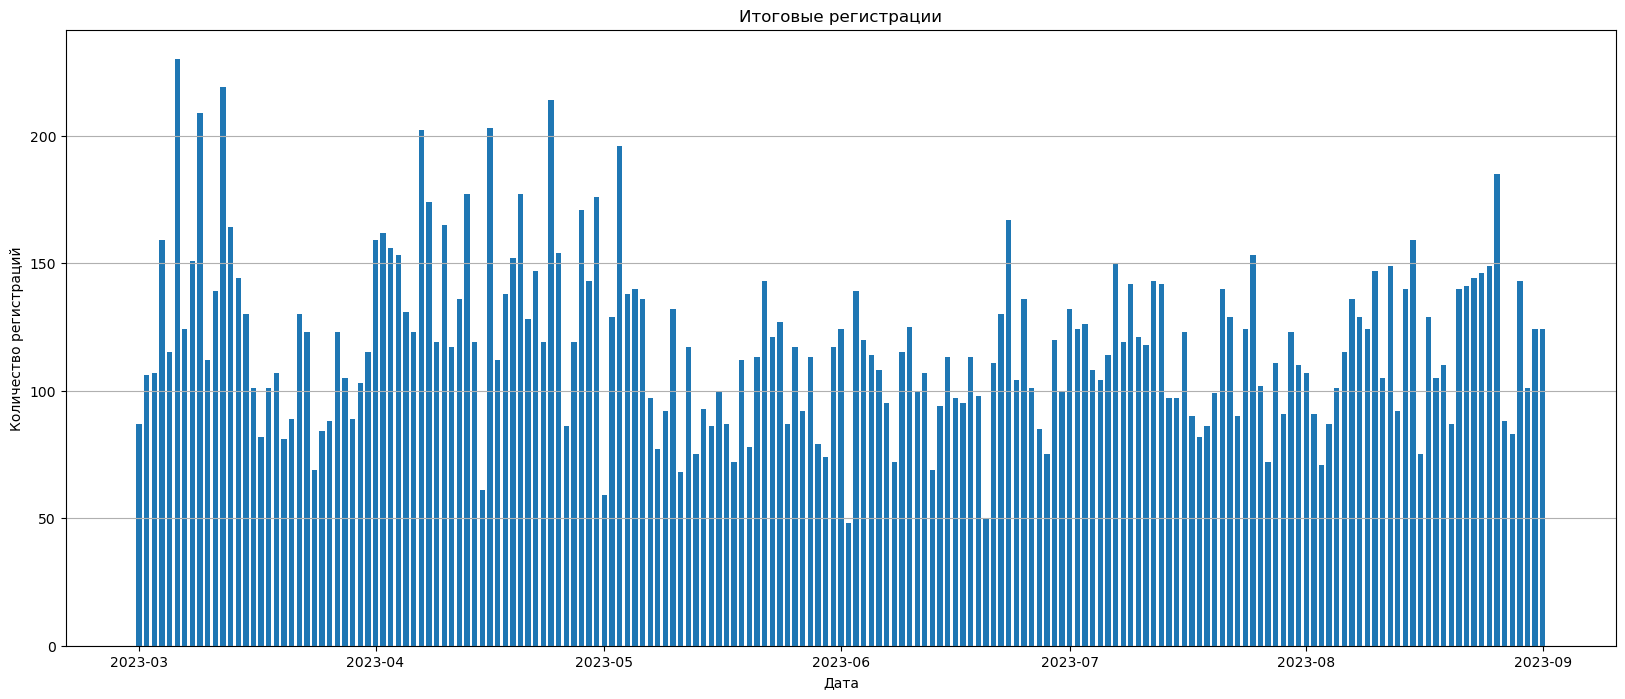

In [42]:
x = merged_ads['date_group']
y = merged_ads['registrations']
fig = plt.figure(figsize = (20,8))
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Количество регистраций')
plt.title('Итоговые регистрации')
plt.bar(x,y, label = 'Итоговые регистрации', width = 0.7)
plt.savefig('./charts/total_registrations.png')
plt.show()

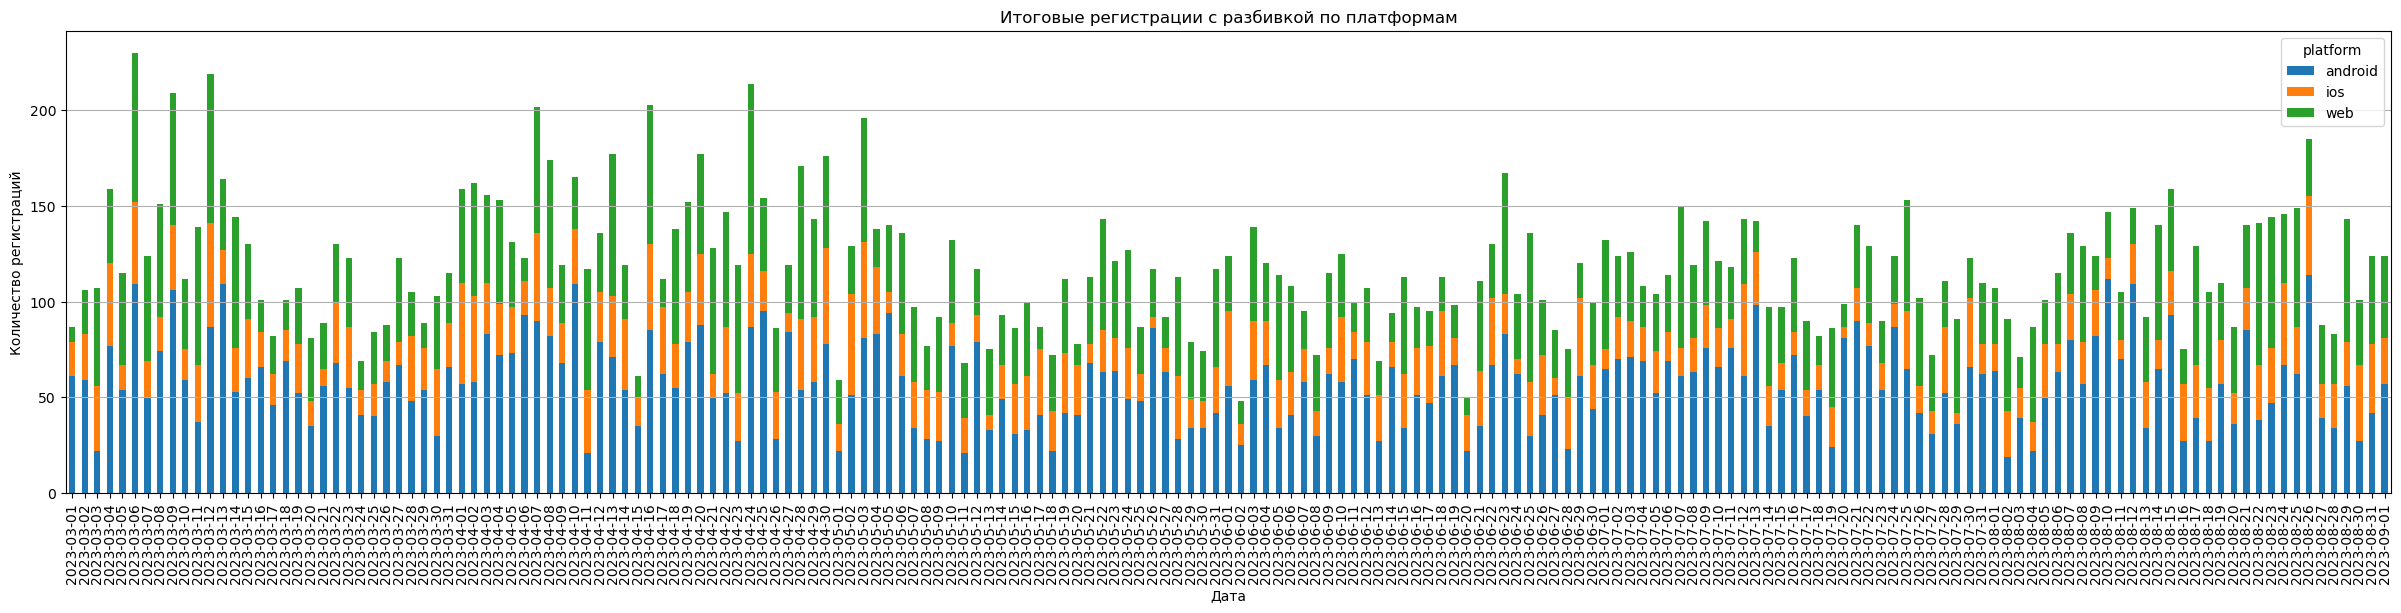

In [43]:
for_stacked_regs = result[['date_group', 'platform', 'registrations']] 
pivot_df_regs = for_stacked_regs.pivot(index='date_group', columns='platform', values='registrations')
pivot_df_regs.plot(kind = 'bar', stacked = True, figsize = (30, 6))
plt.xlabel('Дата')
plt.ylabel('Количество регистраций')
plt.title('Итоговые регистрации с разбивкой по платформам')
plt.savefig('./charts/stacked_total_registrations.png')
plt.grid(axis = 'y')
plt.show()

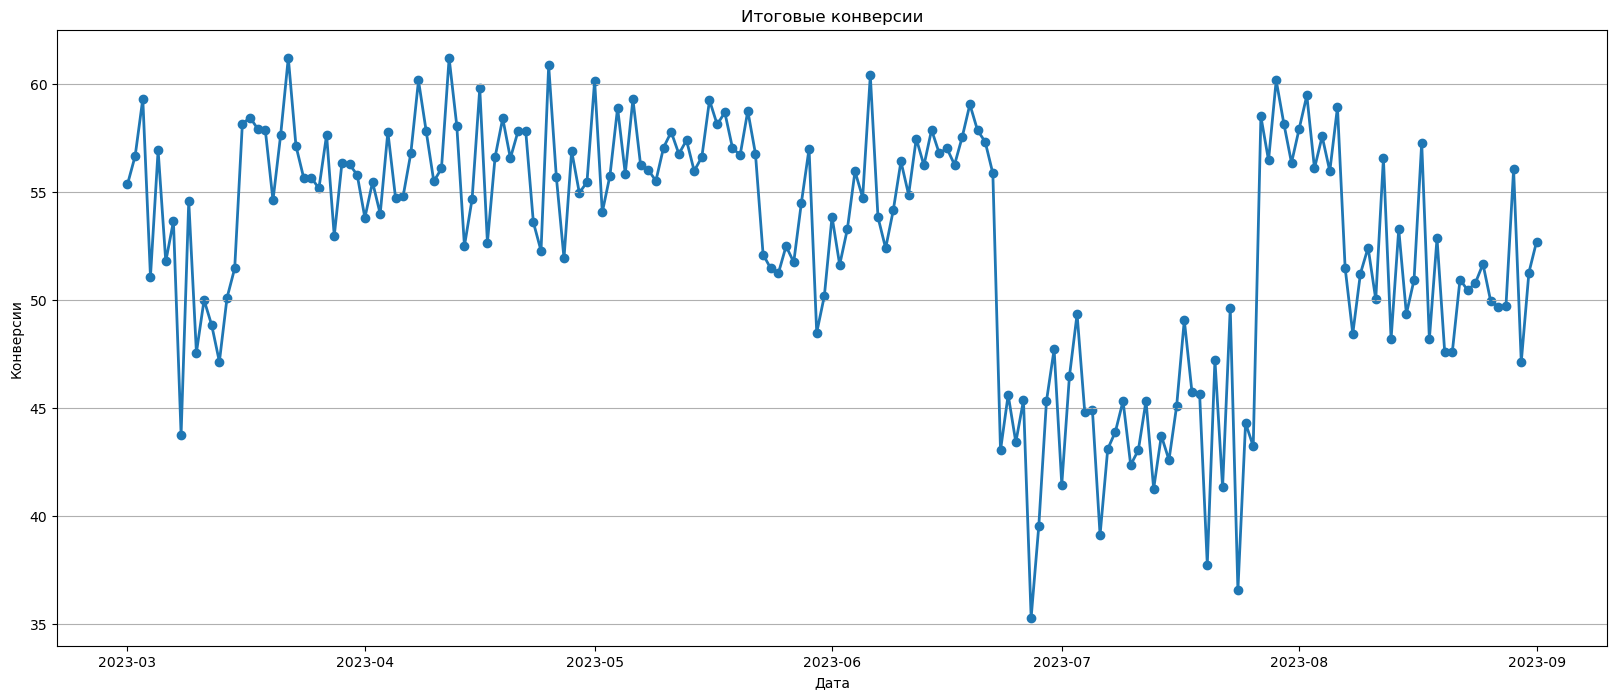

In [44]:
for_visualisation = result.groupby('date_group').agg({'conversion':'mean'}).reset_index()
x = for_visualisation['date_group']
y = for_visualisation['conversion']
fig = plt.figure(figsize = (20,8))
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Конверсии')
plt.title('Итоговые конверсии')
plt.scatter(x, y)
plt.plot(x,y, linewidth = 2)
plt.savefig('./charts/total_conversions.png')
plt.show()

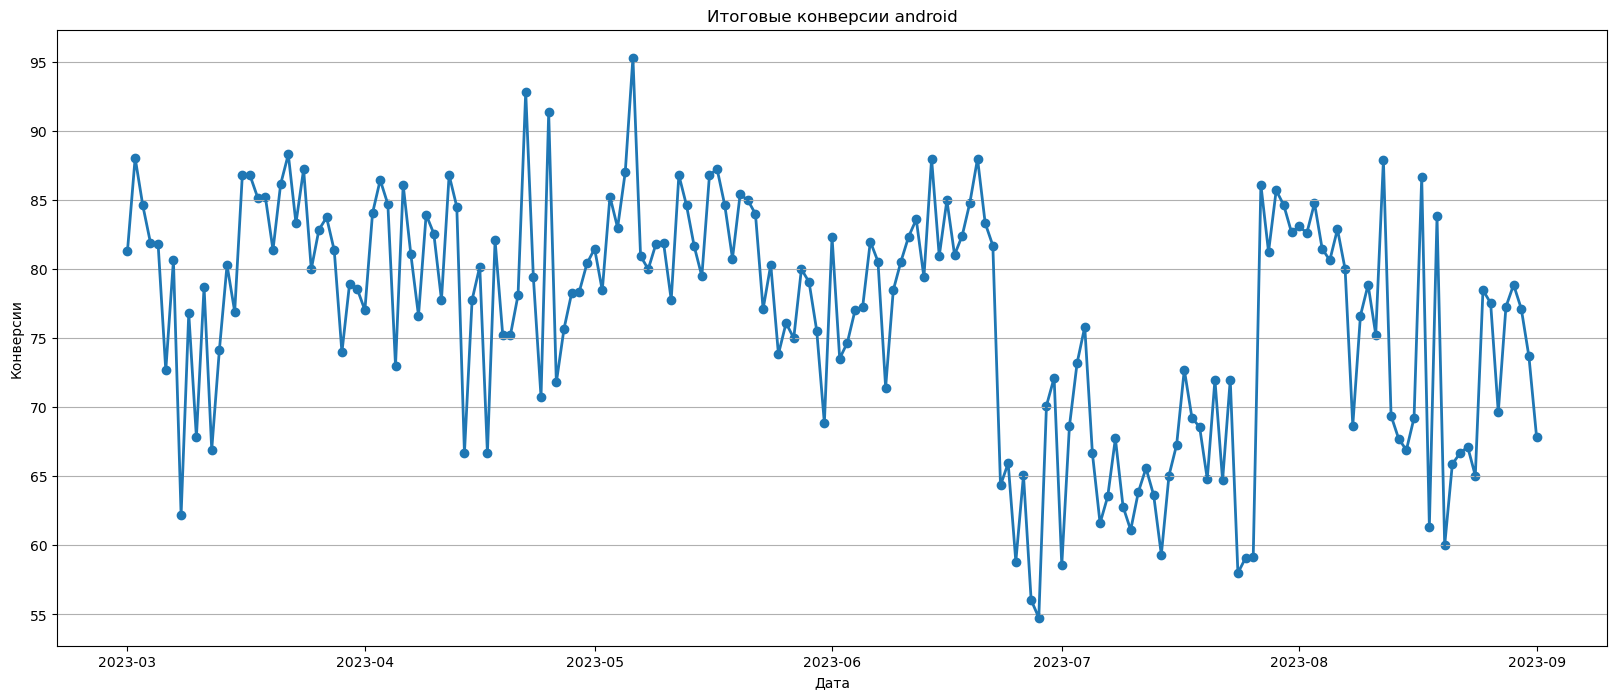

In [45]:
android_vis = result[result['platform'] == 'android']
x = android_vis['date_group']
y = android_vis['conversion']
fig = plt.figure(figsize = (20,8))
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Конверсии')
plt.title('Итоговые конверсии android')
plt.scatter(x, y)
plt.plot(x,y, label = 'Итоговые конверсии', linewidth = 2)
plt.savefig('./charts/android_conversion.png')
plt.show()

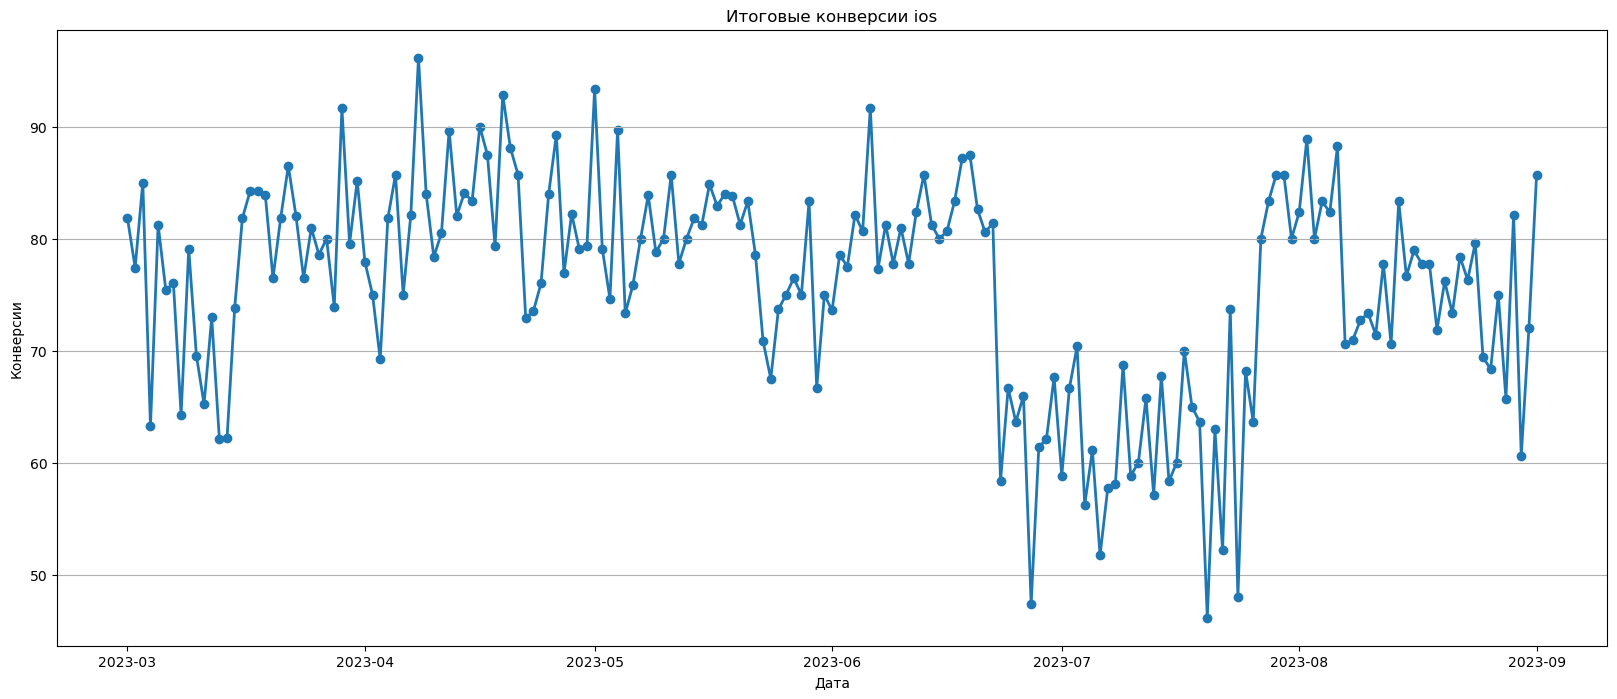

In [46]:
ios_vis = result[result['platform'] == 'ios']
x = ios_vis['date_group']
y = ios_vis['conversion']
fig = plt.figure(figsize = (20,8))
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Конверсии')
plt.title('Итоговые конверсии ios')
plt.scatter(x, y)
plt.plot(x,y, label = 'Итоговые конверсии', linewidth = 2)
plt.savefig('./charts/ios_conversion.png')
plt.show()

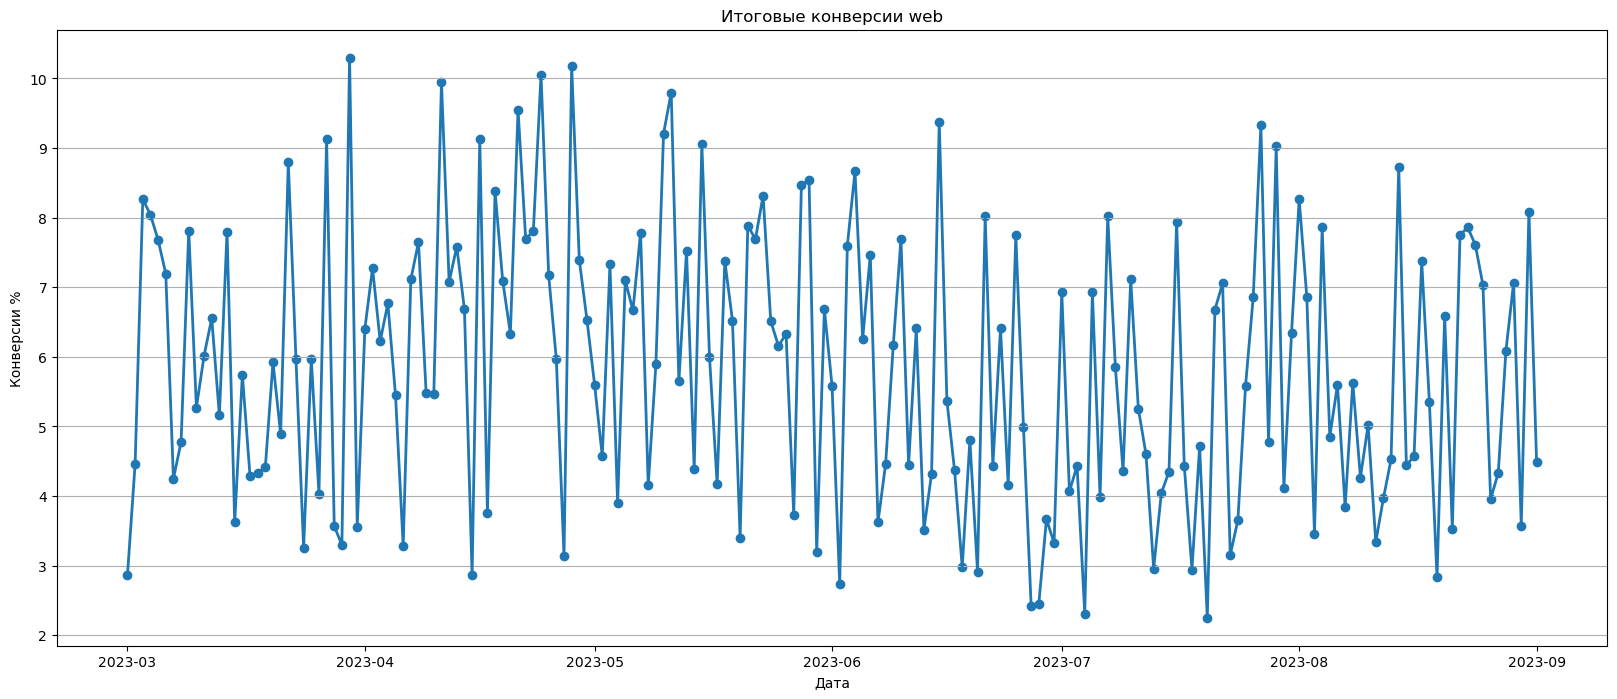

In [47]:
web_vis = result[result['platform'] == 'web']
x = web_vis['date_group']
y = web_vis['conversion']
fig = plt.figure(figsize = (20,8))
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Конверсии %')
plt.title('Итоговые конверсии web')
plt.scatter(x, y)
plt.plot(x,y, linewidth = 2)
plt.savefig('./charts/web_conversion.png')
plt.show()

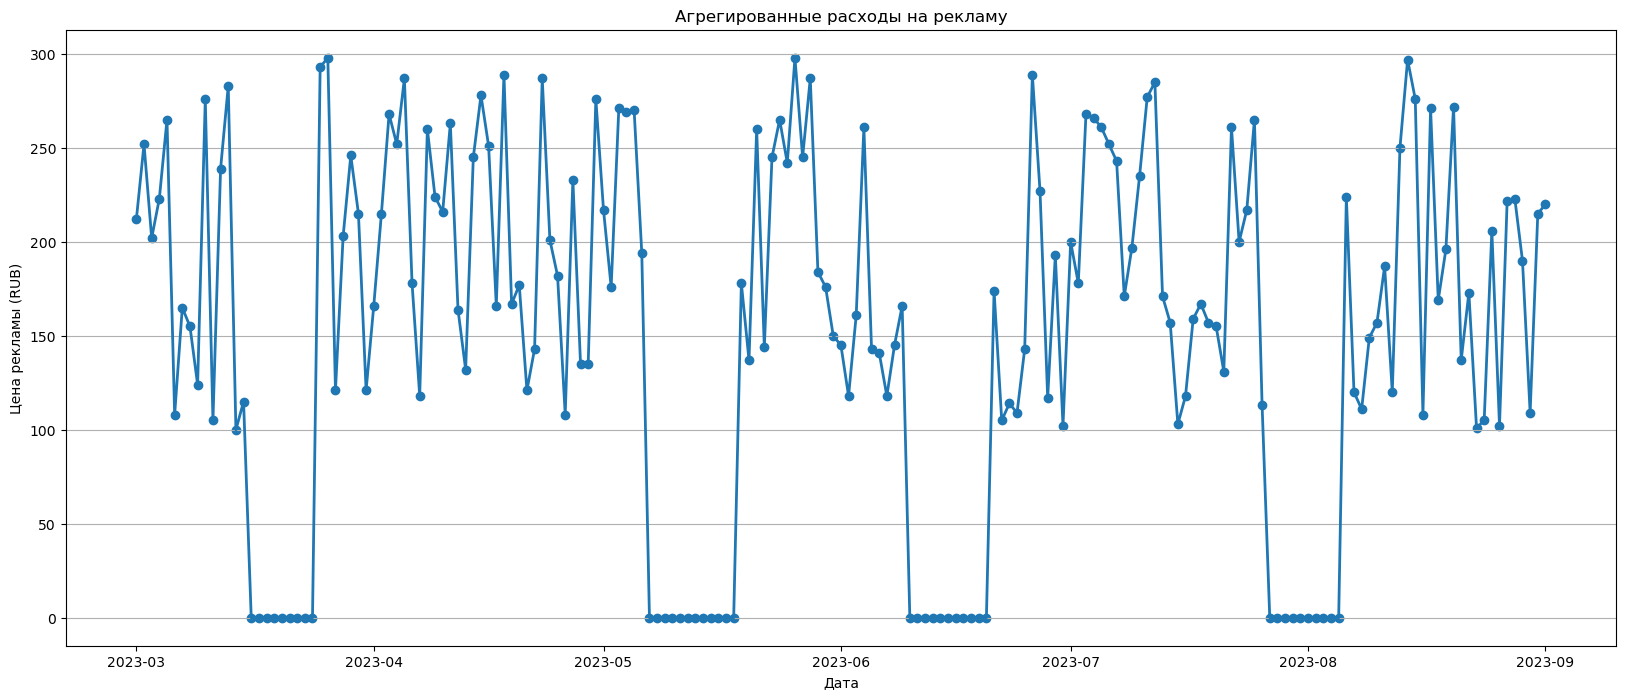

In [48]:
x = merged_ads['date_group']
y = merged_ads['cost']
fig = plt.figure(figsize = (20,8))
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Цена рекламы (RUB)')
plt.title('Агрегированные расходы на рекламу')
plt.plot(x,y,linewidth = 2)
plt.scatter(x, y)
plt.savefig('./charts/cost_per_marketing.png')
plt.show()

In [49]:
new_data = merged_ads[merged_ads['utm_campaign']!= 'none'].groupby('utm_campaign')['date_group'].agg(['min','max']).reset_index()
new_data = new_data.sort_values(by='min').reset_index(drop=True)
new_data.head()

,utm_campaign,min,max
0,advanced_algorithms_series,2023-03-01,2023-03-15
1,virtual_reality_workshop,2023-03-25,2023-05-06
2,ui_ux_design_drive,2023-05-19,2023-06-09
3,women_in_tech_symposium,2023-06-21,2023-07-26
4,intro_to_python_course,2023-08-06,2023-09-01


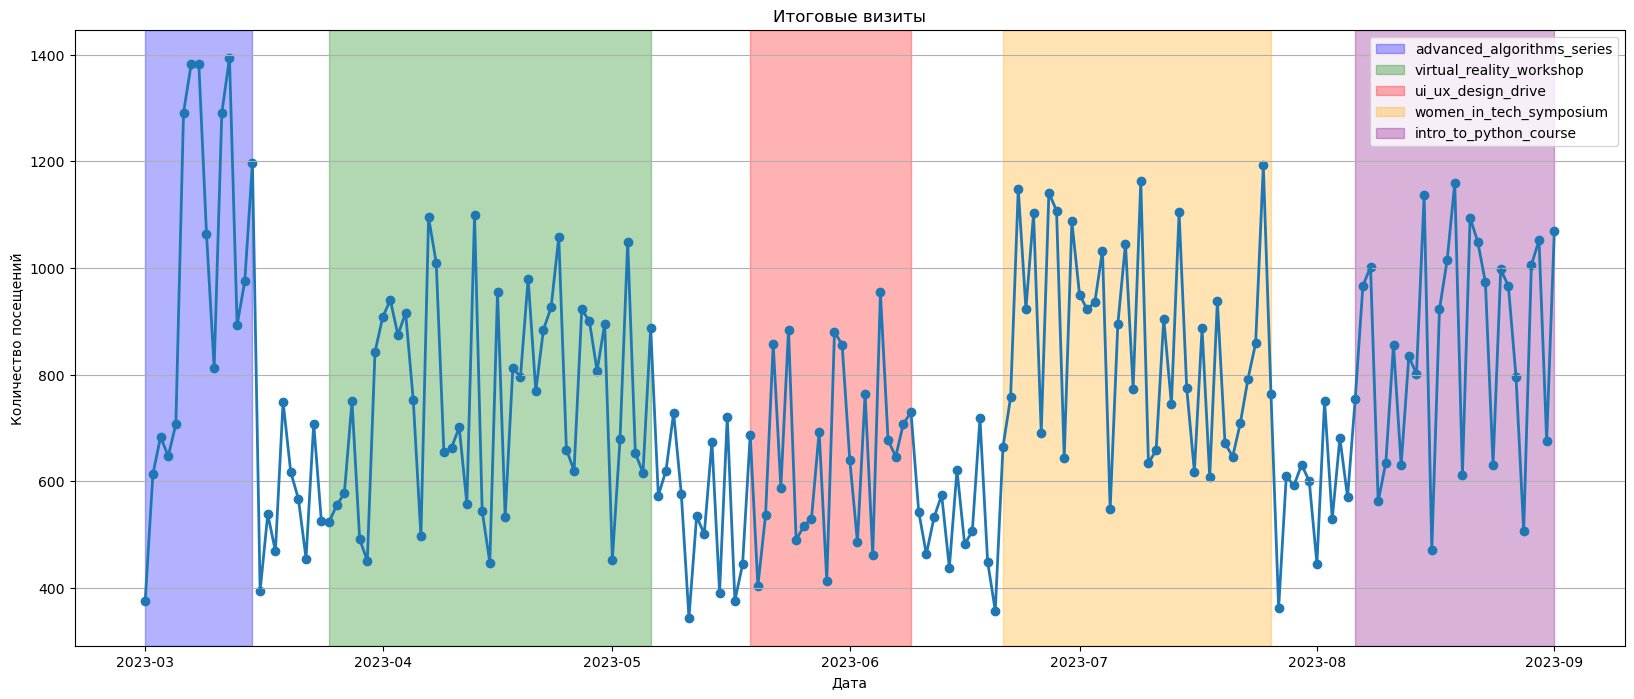

In [50]:
x = merged_ads['date_group']
y = merged_ads['visits']
fig = plt.figure(figsize = (20,8))
colors = ['blue', 'green', 'red', 'orange', 'purple']
for id, row in new_data.iterrows():
    min_date = row['min']
    max_date = row['max']
    campaign_name = row['utm_campaign']
    color = colors[id % len(colors)]
    plt.axvspan(min_date, max_date, color=color, alpha = 0.3, label = campaign_name)
plt.grid(axis = 'y')
plt.scatter(x, y)
plt.plot(x,y, linewidth = 2)
plt.xlabel('Дата')
plt.ylabel('Количество посещений')
plt.title('Итоговые визиты')
plt.legend()
plt.savefig('./charts/registrations_and_visits.png')
plt.show()

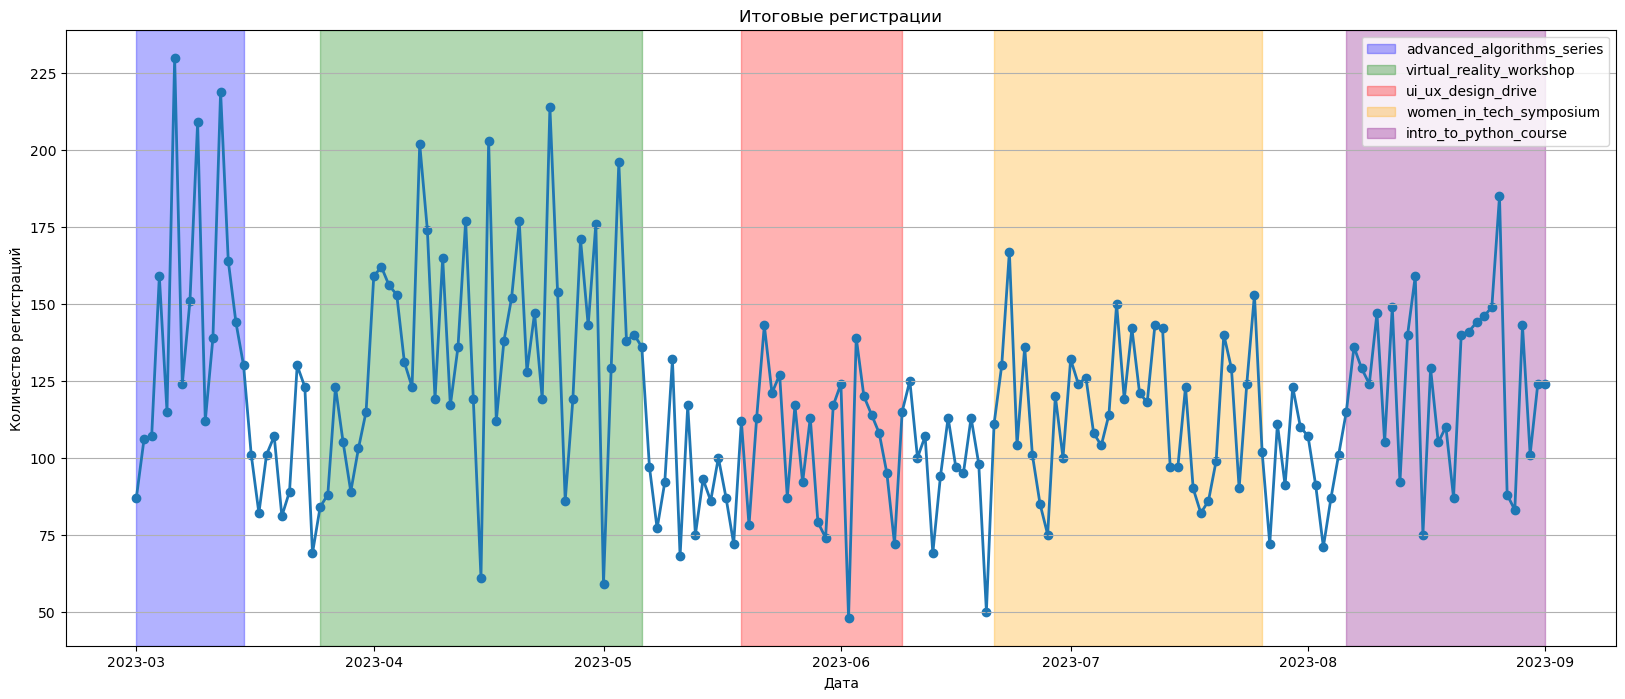

In [51]:
x = merged_ads['date_group']
y = merged_ads['registrations']
fig = plt.figure(figsize = (20,8))
for id, row in new_data.iterrows():
    min_date = row['min']
    max_date = row['max']
    campaign_name = row['utm_campaign']
    color = colors[id % len(colors)]
    plt.axvspan(min_date, max_date, color=color, alpha = 0.3, label = campaign_name)
plt.grid(axis = 'y')
plt.xlabel('Дата')
plt.ylabel('Количество регистраций')
plt.title('Итоговые регистрации')
plt.scatter(x, y)
plt.plot(x,y, linewidth = 2)
plt.legend()
plt.savefig('./charts/registrations_and_marketing.png')
plt.show()